In [1]:
import numpy as np

In [2]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = learning_rate
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [3]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

In [4]:
class Adagrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key,val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key]*grads[key]
            params[key] -= self.lr*grads[key]/(np.sqrt(self.h[key])+1e-7)

In [5]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

from tqdm import tqdm

In [6]:
(x_train, t_train),(x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

SGD_network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100], output_size=10)
Momentum_network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100], output_size=10)
AdaGrad_network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100], output_size=10)
Adam_network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100], output_size=10)

In [7]:
iter_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

SGD_train_loss_list = []
Momentum_train_loss_list = []
AdaGrad_train_loss_list = []
Adam_train_loss_list = []

In [8]:
SGD_optim = SGD(lr = learning_rate)
Momentum_optim = Momentum(lr = learning_rate)
AdaGrad_optim = AdaGrad(lr = learning_rate)
Adam_optim = Adam(lr = learning_rate)

In [9]:
for i in tqdm(range(iter_num)):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    SGD_grad = SGD_network.gradient(x_batch, t_batch)
    Momentum_grad = Momentum_network.gradient(x_batch, t_batch)
    AdaGrad_grad = AdaGrad_network.gradient(x_batch, t_batch)
    Adam_grad = Adam_network.gradient(x_batch, t_batch)
    
    SGD_optim.update(SGD_network.params, SGD_grad)
    Momentum_optim.update(Momentum_network.params, Momentum_grad)
    AdaGrad_optim.update(AdaGrad_network.params, AdaGrad_grad)
    Adam_optim.update(Adam_network.params, Adam_grad)
    
    SGD_loss = SGD_network.loss(x_batch, t_batch)
    Momentum_loss = Momentum_network.loss(x_batch, t_batch)
    AdaGrad_loss = AdaGrad_network.loss(x_batch, t_batch)
    Adam_loss = Adam_network.loss(x_batch, t_batch)
    
    SGD_train_loss_list.append(SGD_loss)
    Momentum_train_loss_list.append(Momentum_loss)
    AdaGrad_train_loss_list.append(AdaGrad_loss)
    Adam_train_loss_list.append(Adam_loss)

100%|██████████| 2000/2000 [00:40<00:00, 49.66it/s]


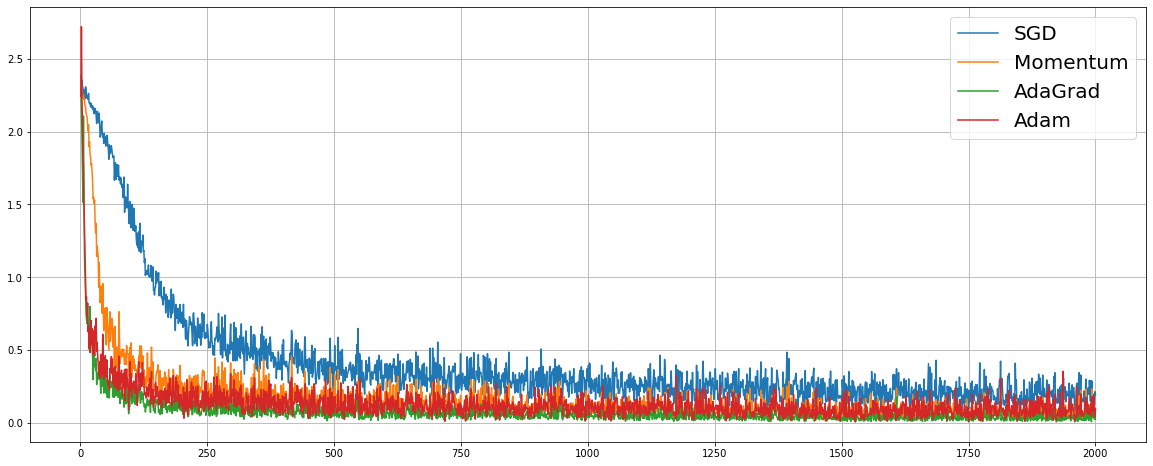

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming we have the following data for epochs and loss values
epochs = np.arange(1, 2001)

# Now we plot these data points
plt.figure(figsize=(20, 8))
plt.plot(epochs, SGD_train_loss_list, label='SGD', linestyle='-', markersize=3)
plt.plot(epochs, Momentum_train_loss_list, label='Momentum', linestyle='-', markersize=3)
plt.plot(epochs, AdaGrad_train_loss_list, label='AdaGrad', linestyle='-', markersize=3)
plt.plot(epochs, Adam_train_loss_list, label='Adam', linestyle='-', markersize=3)

# Adding labels and title
# plt.xlabel('Number of Epochs')
# plt.ylabel('Loss')
# plt.title('Loss decrease over epochs for different optimizers on MNIST dataset')

# Adding a legend
plt.legend(fontsize=20)

# Show grid
plt.grid(True)

# Show the plot
plt.savefig('my_plot.png')
plt.show()